In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import distance

In [36]:
carnegie = pd.read_csv('data/carnegie_with_location.csv')
northcarolina_2023=pd.read_excel('data/North_Carolina/2023_AP Test Results_2023.xlsx',sheet_name='fortablebysch3yrs_2223_final')
uscounties = pd.read_csv('data/uscounties.csv')

In [37]:
northcarolina_counties = uscounties[uscounties['state_id'] == 'NC']
northcarolina_counties=northcarolina_counties.reset_index()
northcarolina_counties=northcarolina_counties[['county','lat','lng','population']]

In [39]:
carnegie.head()

,Unnamed: 0,unitid,name,city,stabbr,basic2000,basic2005,basic2010,basic2015,basic2018,...,hbcu,tribal,hsi,msi,womens,rooms,selindex,address,latitude,longitude
0,0,100654,Alabama A & M University,Normal,AL,16,18,18,18,18,...,1,0,0,1,0,3220,1.0,"4900 Meridian St N, Huntsville, AL 35811, USA",34.783841,-86.572224
1,1,100663,University of Alabama at Birmingham,Birmingham,AL,15,15,15,15,15,...,0,0,0,0,0,2882,2.0,"1720 University Blvd, Birmingham, AL 35294, USA",33.502086,-86.805159
2,2,100690,Amridge University,Montgomery,AL,51,24,24,20,20,...,0,0,0,0,0,0,1.0,"1200 Taylor Rd, Montgomery, AL 36117, USA",32.362671,-86.173926
3,3,100706,University of Alabama in Huntsville,Huntsville,AL,16,16,15,16,16,...,0,0,0,0,0,2200,3.0,"Shelby Center for Science and Technology, 301 ...",34.725161,-86.640471
4,4,100724,Alabama State University,Montgomery,AL,21,18,18,19,19,...,1,0,0,1,0,2079,1.0,"915 S Jackson St, Montgomery, AL 36104, USA",32.362976,-86.293980


In [11]:
northcarolina_counties

,county,lat,lng,population
0,Wake,35.7903,-78.6503,1132103
1,Mecklenburg,35.2467,-80.8328,1115403
2,Guilford,36.0795,-79.7889,539557
3,Forsyth,36.1306,-80.2563,383739
4,Cumberland,35.0487,-78.8277,335207
...,...,...,...,...
95,Gates,36.4449,-76.7005,10509
96,Jones,35.0217,-77.3552,9263
97,Graham,35.3502,-83.8335,8047
98,Hyde,35.5306,-76.2517,4636


In [25]:
northcarolina_2023=pd.read_excel('data/North_Carolina/2023_AP Test Results_2023.xlsx',sheet_name='fortablebysch3yrs_2223_final')

In [27]:
northcarolina_2023.iloc[1:30]

,county index,School System & School,# of Test Takers1,Participation Rate2,# of Test-taker Scoring 3 or Higher3,% of Test-Takers Scoring 3 or Higher4,# of Exams Taken5,# of Exams with Scores of 3 or Higher6,% of Exams with Scores of 3 or Higher7
1,NaN,NC School of Science & Math,343,*,268,78.134111,545,417,76.513761
2,NaN,NC School of the Arts,128,*,109,85.15625,238,198,83.193277
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010,Alamance-Burlington,756,10.662906,406,53.703704,1284,667,51.94704
5,010,Eastern Alamance High,157,12.847791,78,49.681529,261,139,53.256705
6,010,Graham High,67,7.579186,30,44.776119,82,34,41.463415
7,010,Hugh M Cummings High,23,2.43129,1,4.347826,24,1,4.166667
8,010,Southern Alamance High,123,9.346505,73,59.349593,187,101,54.010695
9,010,Walter M Williams High,188,14.40613,92,48.93617,334,154,46.107784
10,010,Western Alamance High,196,19.234544,132,67.346939,393,238,60.559796


In [129]:
northcarolina_2018=pd.read_excel('data/North_Carolina/AP_Test_Results_2018.xlsx',sheet_name='2018')

In [130]:
northcarolina_2018

,Unnamed: 0,School System & School,Unnamed: 2,# of Test Takers1,Participation Rate2,# of Test-taker Scoring 3 or Higher3,% of Test-Takers Scoring 3 or Higher4,# of Exams Taken5,# of Exams with Scores of 3 or Higher6,% of Exams with Scores of 3 or Higher7
0,,,North Carolina,75663,16.450159,42542,56.225632,141732,75563,53.314001
1,NaN,NaN,NC School of Science & Math,375,NaN,341,90.933333,719,629,87.482615
2,NaN,NaN,NC School of the Arts,151,NaN,129,85.430464,281,237,84.341637
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010,Alamance-Burlington,NaN,993,14.193825,440,44.310171,2075,846,40.771084
...,...,...,...,...,...,...,...,...,...,...
658,92K,Raleigh Charter High School,NaN,337,59.964413,314,93.175074,923,790,85.590466
659,92P,Southern Wake Academy,NaN,40,13.20132,14,35,63,24,38.095238
660,92T,Triangle Math And Science Acad,NaN,58,34.117647,43,74.137931,107,74,69.158879
661,92U,Longleaf School of the Arts,NaN,68,21.451104,40,58.823529,147,78,53.061224


In [131]:
# Filter for county-level rows
county_data_2018 = northcarolina_2018[northcarolina_2018["School System & School"].str.contains("County", na=False)]

# Reset the index
county_data_2018.reset_index(drop=True, inplace=True)

# Rename the 'School System & School' column to 'County'
county_data_2018.rename(columns={'School System & School': 'County'}, inplace=True)

# Rename the 'School System & School' column to 'County'
county_data_2018.rename(columns={'# of Test Takers1': 'EXAM_COUNT'}, inplace=True)

# Rename the 'School System & School' column to 'County'
county_data_2018.rename(columns={'# of Test-taker Scoring 3 or Higher3': 'EXAMS_3_OR_ABOVE'}, inplace=True)

# Rename the 'School System & School' column to 'County'
county_data_2018.rename(columns={'% of Test-Takers Scoring 3 or Higher4': 'PERCENT_3_OR_ABOVE'}, inplace=True)


# Remove the word 'County' from the entries in the 'County' column
county_data_2018['County'] = county_data['County'].str.replace(' County', '')
# Display the filtered data
county_data_2018

C:\Users\amahapatra\AppData\Local\Temp\ipykernel_18840\55839278.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_data_2018.rename(columns={'School System & School': 'County'}, inplace=True)
C:\Users\amahapatra\AppData\Local\Temp\ipykernel_18840\55839278.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_data_2018.rename(columns={'# of Test Takers1': 'EXAM_COUNT'}, inplace=True)
C:\Users\amahapatra\AppData\Local\Temp\ipykernel_18840\55839278.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

,Unnamed: 0,County,Unnamed: 2,EXAM_COUNT,Participation Rate2,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE,# of Exams Taken5,# of Exams with Scores of 3 or Higher6,% of Exams with Scores of 3 or Higher7
0,020,Alexander,NaN,171,11.825726,87,50.877193,292,141,48.287671
1,030,Alleghany,NaN,2,*,*,*,*,*,*
2,040,Anson,NaN,19,1.804369,6,31.578947,21,7,33.333333
3,050,Ashe,NaN,97,10.601093,53,54.639175,146,79,54.109589
4,060,Ashe High,NaN,51,8.762887,24,47.058824,72,39,54.166667
...,...,...,...,...,...,...,...,...,...,...
90,960,Stanly,NaN,296,5.374977,123,41.554054,441,168,38.095238
91,970,Stokes,NaN,268,8.915502,133,49.626866,341,163,47.800587
92,980,Surry,NaN,331,9.141121,169,51.057402,546,259,47.435897
93,990,Swain,NaN,85,5.198777,33,38.823529,108,41,37.962963


In [77]:
# Filter for county-level rows
county_data = northcarolina_2023[northcarolina_2023["School System & School"].str.contains("County", na=False)]

# Reset the index
county_data.reset_index(drop=True, inplace=True)

# Rename the 'School System & School' column to 'County'
county_data.rename(columns={'School System & School': 'County'}, inplace=True)

# Rename the 'School System & School' column to 'County'
county_data.rename(columns={'# of Test Takers1': 'EXAM_COUNT'}, inplace=True)

# Rename the 'School System & School' column to 'County'
county_data.rename(columns={'# of Test-taker Scoring 3 or Higher3': 'EXAMS_3_OR_ABOVE'}, inplace=True)

# Rename the 'School System & School' column to 'County'
county_data.rename(columns={'% of Test-Takers Scoring 3 or Higher4': 'PERCENT_3_OR_ABOVE'}, inplace=True)


# Remove the word 'County' from the entries in the 'County' column
county_data['County'] = county_data['County'].str.replace(' County', '')
# Display the filtered data
county_data


C:\Users\amahapatra\AppData\Local\Temp\ipykernel_18840\348150843.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_data.rename(columns={'School System & School': 'County'}, inplace=True)
C:\Users\amahapatra\AppData\Local\Temp\ipykernel_18840\348150843.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_data.rename(columns={'# of Test Takers1': 'EXAM_COUNT'}, inplace=True)
C:\Users\amahapatra\AppData\Local\Temp\ipykernel_18840\348150843.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

,county index,County,EXAM_COUNT,Participation Rate2,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE,# of Exams Taken5,# of Exams with Scores of 3 or Higher6,% of Exams with Scores of 3 or Higher7
0,020,Alexander,109,7.643759,79,72.477064,190,148,77.894737
1,030,Alleghany,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,040,Anson,43,5.02924,6,13.953488,43,6,13.953488
3,050,Ashe,94,10.39823,59,62.765957,150,88,58.666667
4,050,Ashe High,94,12.191958,59,62.765957,150,88,58.666667
...,...,...,...,...,...,...,...,...,...
103,960,Wayne,195,3.852993,69,35.384615,232,87,37.5
104,970,Wilkes,160,6.2,59,36.645963,213,75,35.211268
105,980,Wilson,245,7.630022,154,62.857143,382,234,61.256545
106,990,Yadkin,18,1.156069,13,72.222222,18,13,72.222222


In [76]:
county_data[['County','EXAM_COUNT']]

,County,EXAM_COUNT
0,Alexander,109
1,Alleghany,NaN
2,Anson,43
3,Ashe,94
4,Ashe High,94
...,...,...
103,Wayne,195
104,Wilkes,160
105,Wilson,245
106,Yadkin,18


In [78]:
northcarolina_ap=county_data[['County','EXAM_COUNT','EXAMS_3_OR_ABOVE','PERCENT_3_OR_ABOVE']]

In [79]:
northcarolina_ap

,County,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE
0,Alexander,109,79,72.477064
1,Alleghany,NaN,NaN,NaN
2,Anson,43,6,13.953488
3,Ashe,94,59,62.765957
4,Ashe High,94,59,62.765957
...,...,...,...,...
103,Wayne,195,69,35.384615
104,Wilkes,160,59,36.645963
105,Wilson,245,154,62.857143
106,Yadkin,18,13,72.222222


In [90]:
northcarolina_data

,county,year,population,per_capita_income
0,Alamance,2018,166901,39318
1,Alamance,2019,169590,41182
2,Alamance,2020,171954,44223
3,Alamance,2021,173876,48218
4,Alamance,2022,176353,48980
...,...,...,...,...
495,Yancey,2018,18192,35814
496,Yancey,2019,18394,36935
497,Yancey,2020,18490,39418
498,Yancey,2021,18776,41798


In [118]:
years = ['2018','2019','2020','2021','2022']
pop = []
pci = []
r1r2 = []
public = []
private_notprofit = []

for i in northcarolina_ap.index:
    county = northcarolina_ap.iloc[i].County
    year = '2018'  # northcarolina_ap.iloc[i].Year
    
    # Check if the query returns any results before accessing values
    pop_data = northcarolina_data[(northcarolina_data['county'] == county) & (northcarolina_data['year'] == year)]
    if not pop_data.empty:
        pop.append(pop_data.population.values[0])
    else:
        pop.append(None)  # or some default value
    
    pci_data = northcarolina_data[(northcarolina_data['county'] == county) & (northcarolina_data['year'] == year)]
    if not pci_data.empty:
        pci.append(pci_data.per_capita_income.values[0])
    else:
        pci.append(None)  # or some default value
    
    r1r2_data = northcarolina_counties[northcarolina_counties['county'] == county]
    if not r1r2_data.empty:
        r1r2.append(r1r2_data.closest_five_r1r2_avg.values[0])
    else:
        r1r2.append(None)  # or some default value
    
    public_data = northcarolina_counties[northcarolina_counties['county'] == county]
    if not public_data.empty:
        public.append(public_data.closest_five_public_avg.values[0])
    else:
        public.append(None)  # or some default value
    
    private_notprofit_data = northcarolina_counties[northcarolina_counties['county'] == county]
    if not private_notprofit_data.empty:
        private_notprofit.append(private_notprofit_data.closest_five_private_notprofit_avg.values[0])
    else:
        private_notprofit.append(None)  # or some default value

northcarolina_ap['population'] = pop
northcarolina_ap['per_capita_income'] = pci
northcarolina_ap['closest_five_r1r2_avg'] = r1r2
northcarolina_ap['closest_five_public_avg'] = public
northcarolina_ap['closest_five_private_notprofit_avg'] = private_notprofit

C:\Users\amahapatra\AppData\Local\Temp\ipykernel_18840\2421916144.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northcarolina_ap['population'] = pop
C:\Users\amahapatra\AppData\Local\Temp\ipykernel_18840\2421916144.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northcarolina_ap['per_capita_income'] = pci
C:\Users\amahapatra\AppData\Local\Temp\ipykernel_18840\2421916144.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [132]:
northcarolina_ap

,County,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE,population,per_capita_income,closest_five_r1r2_avg,closest_five_public_avg,closest_five_private_notprofit_avg
0,Alexander,109,79,72.477064,36459.0,37082.0,106.190586,32.003357,56.479992
1,Alleghany,NaN,NaN,NaN,10928.0,37287.0,111.940199,53.370773,76.017350
2,Anson,43,6,13.953488,22782.0,37416.0,117.376394,34.370109,56.055078
3,Ashe,94,59,62.765957,26641.0,35348.0,124.884229,51.967750,51.767312
4,Ashe High,94,59,62.765957,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
103,Wayne,195,69,35.384615,118048.0,39381.0,98.040195,34.068629,49.812230
104,Wilkes,160,59,36.645963,66715.0,37271.0,108.916152,40.211711,67.148565
105,Wilson,245,154,62.857143,78854.0,40127.0,97.450156,29.532186,39.976204
106,Yadkin,18,13,72.222222,37100.0,37479.0,81.754223,37.782770,40.751174


In [117]:
pop = []

for i in range(2, 5):
    county = northcarolina_ap.iloc[i].County
    year = '2018'  # Make sure to define the year variable
    
    # Check if the query returns any results before accessing values
    pop_data = northcarolina_data[(northcarolina_data['county'] == county) & (northcarolina_data['year'] == year)]
    if not pop_data.empty:
        pop.append(pop_data.population.values[0])
    else:
        pop.append(None)  # or some default value

pop

[22782, 26641, None]

In [135]:
import seaborn as sns
from sklearn.model_selection import train_test_split
training, testing = train_test_split(northcarolina_ap, test_size = 0.2, random_state = 100)
features = ['population','per_capita_income','closest_five_r1r2_avg','closest_five_public_avg','closest_five_private_notprofit_avg']
sns.lmplot(data = training, x='PERCENT_3_OR_ABOVE',y='population')

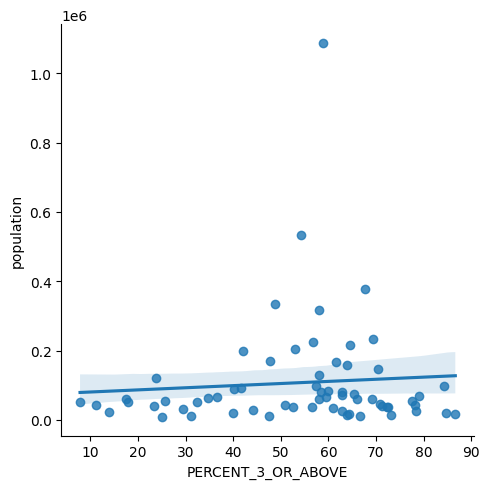

In [141]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'northcarolina_ap' is your DataFrame
# Split the data into training and testing sets
training, testing = train_test_split(northcarolina_ap, test_size=0.2, random_state=300)

# Define the features you are interested in
features = ['population', 'per_capita_income', 'closest_five_r1r2_avg', 'closest_five_public_avg', 'closest_five_private_notprofit_avg']

# Replace non-numeric values with NaN and then drop them in the training set
training['population'] = pd.to_numeric(training['population'], errors='coerce')
training['PERCENT_3_OR_ABOVE'] = pd.to_numeric(training['PERCENT_3_OR_ABOVE'], errors='coerce')

# Drop rows with NaN values in the columns of interest
training_cleaned = training.dropna(subset=['population', 'PERCENT_3_OR_ABOVE'])

# Create a linear model plot using Seaborn
sns.lmplot(data=training_cleaned, x='PERCENT_3_OR_ABOVE', y='population')

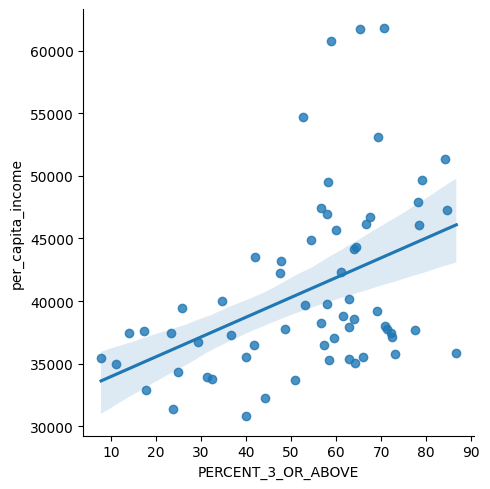

In [142]:
sns.lmplot(data = training, x='PERCENT_3_OR_ABOVE',y='per_capita_income')

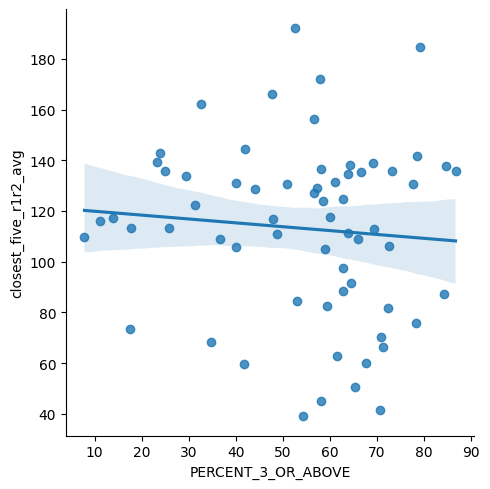

In [143]:
sns.lmplot(data = training, x='PERCENT_3_OR_ABOVE',y='closest_five_r1r2_avg')

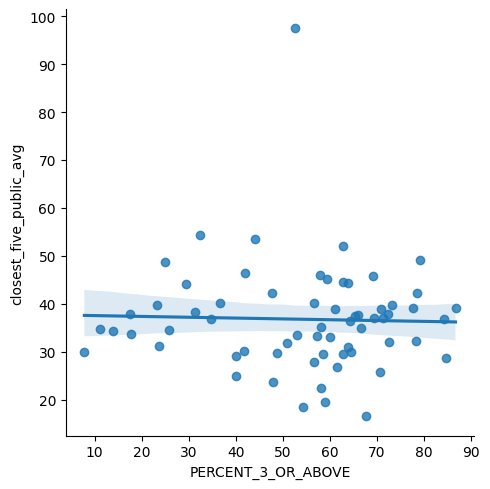

In [144]:
sns.lmplot(data = training, x='PERCENT_3_OR_ABOVE',y='closest_five_public_avg')

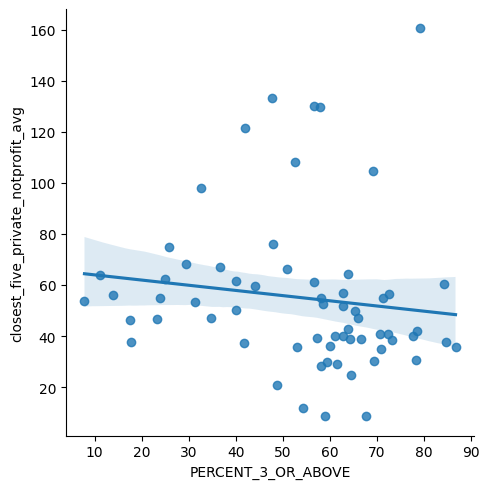

In [145]:
sns.lmplot(data = training, x='PERCENT_3_OR_ABOVE',y='closest_five_private_notprofit_avg')

In [80]:
northcarolina_data

,county,year,population,per_capita_income
0,Alamance,2018,166901,39318
1,Alamance,2019,169590,41182
2,Alamance,2020,171954,44223
3,Alamance,2021,173876,48218
4,Alamance,2022,176353,48980
...,...,...,...,...
495,Yancey,2018,18192,35814
496,Yancey,2019,18394,36935
497,Yancey,2020,18490,39418
498,Yancey,2021,18776,41798


In [33]:
northcarolina_counties

,county,lat,lng,population
0,Wake,35.7903,-78.6503,1132103
1,Mecklenburg,35.2467,-80.8328,1115403
2,Guilford,36.0795,-79.7889,539557
3,Forsyth,36.1306,-80.2563,383739
4,Cumberland,35.0487,-78.8277,335207
...,...,...,...,...
95,Gates,36.4449,-76.7005,10509
96,Jones,35.0217,-77.3552,9263
97,Graham,35.3502,-83.8335,8047
98,Hyde,35.5306,-76.2517,4636


In [44]:
carnegie[carnegie['basic2021'].isin([15,16])]

,Unnamed: 0,unitid,name,city,stabbr,basic2000,basic2005,basic2010,basic2015,basic2018,...,hbcu,tribal,hsi,msi,womens,rooms,selindex,address,latitude,longitude
1,1,100663,University of Alabama at Birmingham,Birmingham,AL,15,15,15,15,15,...,0,0,0,0,0,2882,2.0,"1720 University Blvd, Birmingham, AL 35294, USA",33.502086,-86.805159
3,3,100706,University of Alabama in Huntsville,Huntsville,AL,16,16,15,16,16,...,0,0,0,0,0,2200,3.0,"Shelby Center for Science and Technology, 301 ...",34.725161,-86.640471
5,5,100751,The University of Alabama,Tuscaloosa,AL,15,16,16,16,15,...,0,0,0,0,0,8443,2.0,"Tuscaloosa, AL 35487, USA",33.211438,-87.540100
9,9,100858,Auburn University,Auburn,AL,15,16,16,16,15,...,0,0,0,0,0,4823,3.0,"Auburn, AL 36849, USA",32.598055,-85.494267
43,43,102094,University of South Alabama,Mobile,AL,16,18,18,16,16,...,0,0,0,0,0,3217,2.0,"307 N University Blvd, Mobile, AL 36688, USA",30.695941,-88.184236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,3417,445188,University of California-Merced,Merced,CA,-2,-2,-2,16,16,...,0,0,0,0,0,4016,1.0,"5200 Lake Rd, Merced, CA 95343, USA",37.364703,-120.424094
3717,3717,482149,Augusta University,Augusta,GA,21,19,19,16,17,...,0,0,0,0,0,1228,2.0,"1120 15th St, Augusta, GA 30912, USA",33.470909,-81.989885
3744,3744,483124,Arizona State University Digital Immersion,Scottsdale,AZ,-2,-2,-2,17,16,...,0,0,0,0,0,0,0.0,"1151 S Forest Ave, Tempe, AZ, USA",33.422998,-111.927831
3793,3793,486840,Kennesaw State University,Kennesaw,GA,21,18,18,17,16,...,0,0,0,0,0,5116,2.0,"Kennesaw, GA, USA",34.023434,-84.615490


In [45]:
def closest_five(carnegie_univ_data,lat,long):

    # carnegie_univ_data is meant to be sublist/subdataframe of carnegie dataset (with location)
    # lat is meant to be the latitude of the location (usually county)
    # long is meant to be the longitude of the location
    # Returns the average distance to the five closest universities from the supplied list.

    univ_distance = {'unitid':[],'distance':[]}
    for i in carnegie_univ_data.index:
        univ_distance['unitid']=univ_distance['unitid']+[carnegie_univ_data.unitid[i]]
        univ_distance['distance']=univ_distance['distance']+[distance((lat,long),(carnegie_univ_data.latitude[i],carnegie_univ_data.longitude[i])).km]
    univ_distance = pd.DataFrame(univ_distance)
    closest_five = univ_distance.sort_values(by = 'distance')[:5]
    return np.mean(closest_five['distance'].values)

carnegie_r1r2 = carnegie[carnegie['basic2021'].isin([15,16])]
closest_five(carnegie_r1r2,40.902771, -73.133850)  # This is the coordinates of Stony Brook.

44.58800478079978

In [48]:
northcarolina_counties['closest_five_r1r2_avg'] = northcarolina_counties.apply(lambda x: closest_five(carnegie_r1r2,x.lat, x.lng), axis=1)

In [51]:
northcarolina_counties

,county,lat,lng,population,closest_five_r1r2_avg,closest_five_private_notprofit_avg
0,Wake,35.7903,-78.6503,1132103,58.220189,3.956381
1,Mecklenburg,35.2467,-80.8328,1115403,105.001218,8.621361
2,Guilford,36.0795,-79.7889,539557,39.040931,12.020778
3,Forsyth,36.1306,-80.2563,383739,59.973540,8.577037
4,Cumberland,35.0487,-78.8277,335207,111.096306,21.020127
...,...,...,...,...,...,...
95,Gates,36.4449,-76.7005,10509,118.981300,51.003648
96,Jones,35.0217,-77.3552,9263,134.946532,106.473156
97,Graham,35.3502,-83.8335,8047,135.887955,62.360377
98,Hyde,35.5306,-76.2517,4636,175.657729,125.687994


In [85]:
carnegie_public = carnegie[carnegie['control'] == 1]
northcarolina_counties['closest_five_public_avg'] = northcarolina_counties.apply(lambda x: closest_five(carnegie_public,x.lat, x.lng), axis=1)

In [86]:
carnegie_private_notprofit = carnegie[carnegie['control'] == 2]
northcarolina_counties['closest_five_private_notprofit_avg'] = northcarolina_counties.apply(lambda x: closest_five(carnegie_private_notprofit,x.lat, x.lng), axis=1)

In [87]:
northcarolina_counties

,county,lat,lng,population,closest_five_r1r2_avg,closest_five_private_notprofit_avg,closest_five_public_avg
0,Wake,35.7903,-78.6503,1132103,58.220189,3.956381,23.320156
1,Mecklenburg,35.2467,-80.8328,1115403,105.001218,8.621361,19.399880
2,Guilford,36.0795,-79.7889,539557,39.040931,12.020778,18.365174
3,Forsyth,36.1306,-80.2563,383739,59.973540,8.577037,16.492897
4,Cumberland,35.0487,-78.8277,335207,111.096306,21.020127,29.785289
...,...,...,...,...,...,...,...
95,Gates,36.4449,-76.7005,10509,118.981300,51.003648,43.077488
96,Jones,35.0217,-77.3552,9263,134.946532,106.473156,37.748943
97,Graham,35.3502,-83.8335,8047,135.887955,62.360377,48.709654
98,Hyde,35.5306,-76.2517,4636,175.657729,125.687994,78.679769


In [52]:
import data_loaders
incomes = data_loaders.gimmeCountyIncomes()
incomes = incomes[incomes['State_Abbreviation']=='NC']
#incomes = pd.concat([pd.DataFrame([['Shawano','WI',42033,43883,46611,50004,50444]], columns=incomes.columns), incomes], ignore_index=True)

In [53]:
incomes

,County,State_Abbreviation,2018,2019,2020,2021,2022
5852,Alamance,NC,39318,41182,44223,48218,48980
5855,Alexander,NC,37082,39092,42020,46049,48035
5858,Alleghany,NC,37287,39432,41553,44417,44464
5861,Anson,NC,37416,40772,42032,47342,50187
5864,Ashe,NC,35348,37464,40730,44051,44433
...,...,...,...,...,...,...,...
6137,Wayne,NC,39381,41268,44189,49132,49370
6140,Wilkes,NC,37271,38707,41195,45732,47495
6143,Wilson,NC,40127,41536,44619,48558,48774
6146,Yadkin,NC,37479,39468,41757,46694,47455


In [60]:
county_data[county_data['County'].isin(incomes['County'].values) == False]

,county index,County,# of Test Takers1,Participation Rate2,# of Test-taker Scoring 3 or Higher3,% of Test-Takers Scoring 3 or Higher4,# of Exams Taken5,# of Exams with Scores of 3 or Higher6,% of Exams with Scores of 3 or Higher7
4,050,Ashe High,94,12.191958,59,62.765957,150,88,58.666667
6,060,Avery High,42,7.011686,27,64.285714,61,38,62.295082
14,130,Cabarrus Schools Virtua,*,*,*,*,*,*,*
17,150,Camden High,18,4.054054,12,66.666667,28,19,67.857143
23,200,Tri-County Early College High,*,*,*,*,*,*,*
30,270,Currituck High,79,7.625483,62,78.481013,152,116,76.315789
50,460,Hertford High,*,*,*,*,*,*,*
52,470,Hoke High,101,5.158325,18,17.821782,112,19,16.964286
58,530,Lee Sr High,80,5.442177,25,31.25,108,27,25
64,590,Mcdowell,132,7.366071,64,47.727273,187,91,48.663102


In [62]:
population = data_loaders.gimmeCountyPopulation()
population=population[population['State_Abbreviation']=='NC']
#population = pd.concat([pd.DataFrame([['Shawano','WI',40725,40794,40873,40812,40886]], columns=population.columns), population], ignore_index=True)
population

,County,State_Abbreviation,2018,2019,2020,2021,2022
5851,Alamance,NC,166901,169590,171954,173876,176353
5854,Alexander,NC,36459,36499,36482,36467,36512
5857,Alleghany,NC,10928,10867,10897,11066,11185
5860,Anson,NC,22782,21705,22033,22254,22202
5863,Ashe,NC,26641,26671,26580,26764,27110
...,...,...,...,...,...,...,...
6136,Wayne,NC,118048,117792,117266,116866,117286
6139,Wilkes,NC,66715,66316,65904,65818,65784
6142,Wilson,NC,78854,78907,78807,78283,78449
6145,Yadkin,NC,37100,37212,37246,37258,37463


In [64]:
northcarolina_data = {'county':[],'year':[],'population':[],'per_capita_income':[]}
years = ['2018','2019','2020','2021','2022']
for county in incomes['County'].values:
    for year in years:
        northcarolina_data['county'] = northcarolina_data['county']+[county]
        northcarolina_data['year'] = northcarolina_data['year']+[year]
        northcarolina_data['population'] = northcarolina_data['population']+[int(population[population['County'] == county][year].values[0])]
        northcarolina_data['per_capita_income']= northcarolina_data['per_capita_income']+[int(incomes[incomes['County'] == county][year].values[0])]

In [66]:

northcarolina_data = pd.DataFrame(northcarolina_data)
northcarolina_data

,county,year,population,per_capita_income
0,Alamance,2018,166901,39318
1,Alamance,2019,169590,41182
2,Alamance,2020,171954,44223
3,Alamance,2021,173876,48218
4,Alamance,2022,176353,48980
...,...,...,...,...
495,Yancey,2018,18192,35814
496,Yancey,2019,18394,36935
497,Yancey,2020,18490,39418
498,Yancey,2021,18776,41798


In [35]:
# Remove the word 'County' from 'County Index' in county_data
county_data['County Index'] = county_data['county Index'].str.replace(" County", "", case=False).str.strip()

# Match and filter northcarolina_counties based on cleaned county names
filtered_counties = northcarolina_counties[
    northcarolina_counties['county'].str.strip().isin(county_data['County Index'])
]

# Display the filtered DataFrame
print(filtered_counties)


KeyError: 'County Index'

In [ ]:
df = pd.read_csv('data/North_Carolina/AP_Test_Results_2023.csv',header=1)


In [23]:
df.head()

,Unnamed: 0,School System & School,Unnamed: 2,# of Test Takers1,Participation Rate2,# of Test-taker Scoring 3 or Higher3,% of Test-Takers Scoring 3 or Higher4,# of Exams Taken5,# of Exams with Scores of 3 or Higher6,% of Exams with Scores of 3 or Higher7,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,,,North Carolina,75393,16.1,45610,60.5,136664,80756,59.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NC School of Science & Math,343,*,268,78.1,545,417,76.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NC School of the Arts,128,*,109,85.2,238,198,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010,NaN,Alamance-Burlington,756,10.7,406,53.7,1284,667,51.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.columns

Index(['Unnamed: 0', 'School System & School', 'Unnamed: 2',
       '# of Test Takers1', 'Participation Rate2',
       '# of Test-taker Scoring 3 or Higher3',
       '% of Test-Takers Scoring 3 or Higher4', '# of Exams Taken5',
       '# of Exams with Scores of 3 or Higher6',
       '% of Exams with Scores of 3 or Higher7', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              619 non-null    object 
 1   School System & School                  436 non-null    object 
 2   Unnamed: 2                              612 non-null    object 
 3   # of Test Takers1                       599 non-null    object 
 4   Participation Rate2                     599 non-null    object 
 5   # of Test-taker Scoring 3 or Higher3    599 non-null    object 
 6   % of Test-Takers Scoring 3 or Higher4   599 non-null    object 
 7   # of Exams Taken5                       599 non-null    object 
 8   # of Exams with Scores of 3 or Higher6  599 non-null    object 
 9   % of Exams with Scores of 3 or Higher7  599 non-null    object 
 10  Unnamed: 10                             0 non-null      float6

In [28]:
df.fillna('',inplace=True)

C:\Users\shazr\AppData\Local\Temp\ipykernel_50204\3094999256.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('',inplace=True)


In [29]:
df.head()

,Unnamed: 0,School System & School,Unnamed: 2,# of Test Takers1,Participation Rate2,# of Test-taker Scoring 3 or Higher3,% of Test-Takers Scoring 3 or Higher4,# of Exams Taken5,# of Exams with Scores of 3 or Higher6,% of Exams with Scores of 3 or Higher7,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,,,North Carolina,75393,16.1,45610,60.5,136664,80756,59.1,,,,,,,
1,,,NC School of Science & Math,343,*,268,78.1,545,417,76.5,,,,,,,
2,,,NC School of the Arts,128,*,109,85.2,238,198,83.2,,,,,,,
3,,,,,,,,,,,,,,,,,
4,010,,Alamance-Burlington,756,10.7,406,53.7,1284,667,51.9,,,,,,,


In [31]:
df.rename(columns={
    'Unnamed: 2': 'School_System',
}, inplace=True)

In [32]:
df.head()

,Unnamed: 0,School_System,School_System,# of Test Takers1,Participation Rate2,# of Test-taker Scoring 3 or Higher3,% of Test-Takers Scoring 3 or Higher4,# of Exams Taken5,# of Exams with Scores of 3 or Higher6,% of Exams with Scores of 3 or Higher7,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,,,North Carolina,75393,16.1,45610,60.5,136664,80756,59.1,,,,,,,
1,,,NC School of Science & Math,343,*,268,78.1,545,417,76.5,,,,,,,
2,,,NC School of the Arts,128,*,109,85.2,238,198,83.2,,,,,,,
3,,,,,,,,,,,,,,,,,
4,010,,Alamance-Burlington,756,10.7,406,53.7,1284,667,51.9,,,,,,,


In [35]:
carnegie21=df[['School_System','# of Test Takers1','Participation Rate2','# of Test-taker Scoring 3 or Higher3']] 

In [36]:
carnegie21.head()

,School_System,School_System,# of Test Takers1,Participation Rate2,# of Test-taker Scoring 3 or Higher3
0,,North Carolina,75393,16.1,45610
1,,NC School of Science & Math,343,*,268
2,,NC School of the Arts,128,*,109
3,,,,,
4,,Alamance-Burlington,756,10.7,406


In [39]:
x=carnegie21['# of Test Takers1']
y=carnegie21['Participation Rate2']


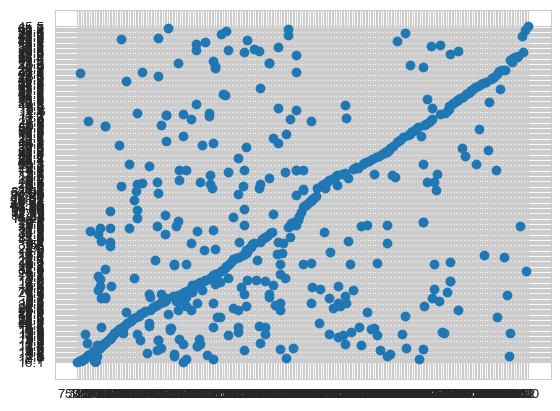

In [40]:
plt.scatter(x,y)
p